# Generate our Averaged Similarity Graph 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import networkx as nx
import re
import matplotlib.pyplot as plt 

# all my graph functions
from graphUtils import *

In [3]:
input_dir = "../data/simMatrices/"
output_dir = "../data/graphs/"

In [4]:
files = os.listdir(input_dir)
files

['chart events_activity.csv',
 'chart events_demographics.csv',
 'chart events_diet.csv',
 'chart events_heart lung.csv',
 'chart events_medical history.csv',
 'chart events_pain.csv',
 'chart events_physical assessment.csv',
 'lab tests_antibodies.csv',
 'lab tests_blood.csv',
 'lab tests_breakdown products.csv',
 'lab tests_enzymes.csv',
 'lab tests_hepatitis.csv',
 'lab tests_other lab.csv',
 'lab tests_proteins.csv']

In [5]:
# load and create our edges dataframe
g_df = None
for f in files:
    # generate partial dataframe
    data_group = re.search("_(.*)\\.", f).group(1)
    data_type = re.search("(.*)_", f).group(1)
    print(f, data_group, data_type)
    
    tmp_df = pd.read_csv(input_dir + f)
    tmp_df['data_group'] = data_group
    tmp_df['data_type'] = data_type
    
    # add to graph dataframe
    if g_df is None:
        g_df = tmp_df
    else:
        g_df = pd.concat([g_df, tmp_df], axis = 0)
        
# rename similarity as weight
g_df = g_df.rename(columns = {'similarity':'weight'})
g_df.head()

chart events_activity.csv activity chart events
chart events_demographics.csv demographics chart events
chart events_diet.csv diet chart events
chart events_heart lung.csv heart lung chart events
chart events_medical history.csv medical history chart events
chart events_pain.csv pain chart events
chart events_physical assessment.csv physical assessment chart events
lab tests_antibodies.csv antibodies lab tests
lab tests_blood.csv blood lab tests
lab tests_breakdown products.csv breakdown products lab tests
lab tests_enzymes.csv enzymes lab tests
lab tests_hepatitis.csv hepatitis lab tests
lab tests_other lab.csv other lab lab tests
lab tests_proteins.csv proteins lab tests


,patient_1,patient_2,weight,data_group,data_type
0,4,4,1.000000,activity,chart events
1,52,4,0.804625,activity,chart events
2,78,4,0.878708,activity,chart events
3,117,4,0.496871,activity,chart events
4,140,4,0.768637,activity,chart events


In [13]:
# average our data and subset to top values
k = 10

g_df = g_df.groupby(['patient_1', 'patient_2'], as_index = False)['weight'].mean()
g_df = g_df.loc[g_df['patient_1'] != g_df['patient_2']]
g_df["rank"] = g_df.groupby("patient_1")["weight"].rank("dense", ascending=False)
filtered_g_df = g_df[g_df['rank'] <= k]
filtered_g_df

,patient_1,patient_2,weight,rank
16,4,314,0.822138,2.0
32,4,761,0.776624,9.0
54,4,1152,0.825192,1.0
138,4,3064,0.821944,3.0
204,4,4741,0.786010,7.0
...,...,...,...,...
8317068,99923,82451,0.857315,5.0
8317117,99923,84881,0.865838,4.0
8317211,99923,88695,0.838180,8.0
8317332,99923,94008,0.897609,1.0


In [21]:
# generate graph
G=nx.from_pandas_edgelist(filtered_g_df, 'patient_1', 'patient_2', ['weight', 'rank'])
G

In [27]:
# save our graph
nx.write_gpickle(G,output_dir + "cosineGraph_K10_averaged.pkl")

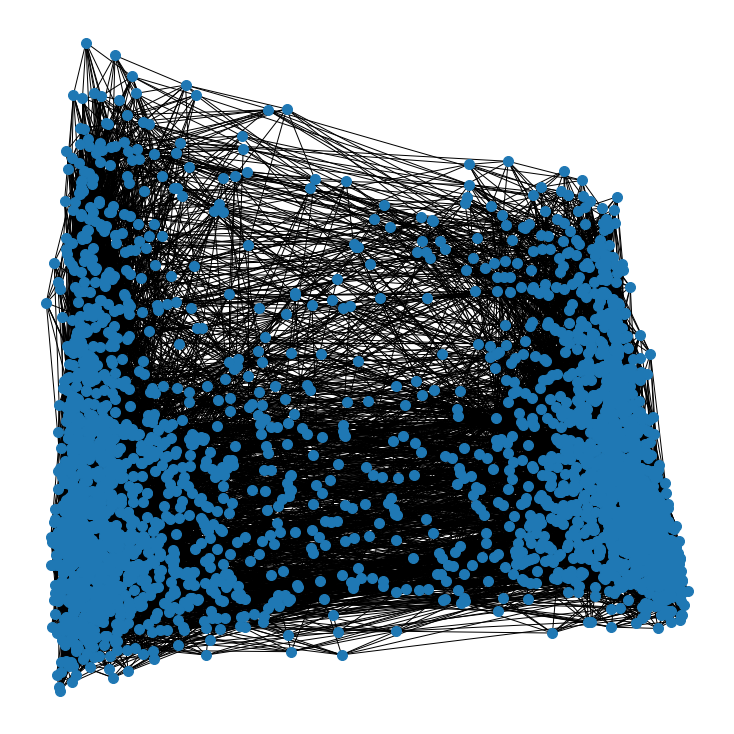

In [26]:
plt.figure(1, (10,10))
nx.draw_spectral(G, node_size = 100)
#plt.savefig(output_dir + "spectral_K5_blood_cosine.png")